## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Libraries</p>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error
)
import matplotlib.pyplot as plt

import sys
sys.path.append('../src/')

from models.train_model import Train
from data.partitions import split_data
from models.predict_model import Predict
from features.build_features import ZirconsDataProcessor

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Load Data</p>

In [3]:
df_raw = pd.read_excel('../data/raw/diamonds.xlsx')
df_bal = pd.read_excel('../data/processed/diamonds_balanced.xlsx')
df_raw.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Unbalanced Data</p>

#### Train model

In [4]:
processor = ZirconsDataProcessor(df_raw)
data, price = processor.data_processor()

X_train, X_test, y_train, y_test = split_data(data, price)

trainer = Train()
best_model, feature_relevance, top_score = trainer.train_model(X_train, y_train, 
                                           'best_unbalanced_model')



Fitting 3 folds for each of 27 candidates, totalling 81 fits


#### Feature relevance

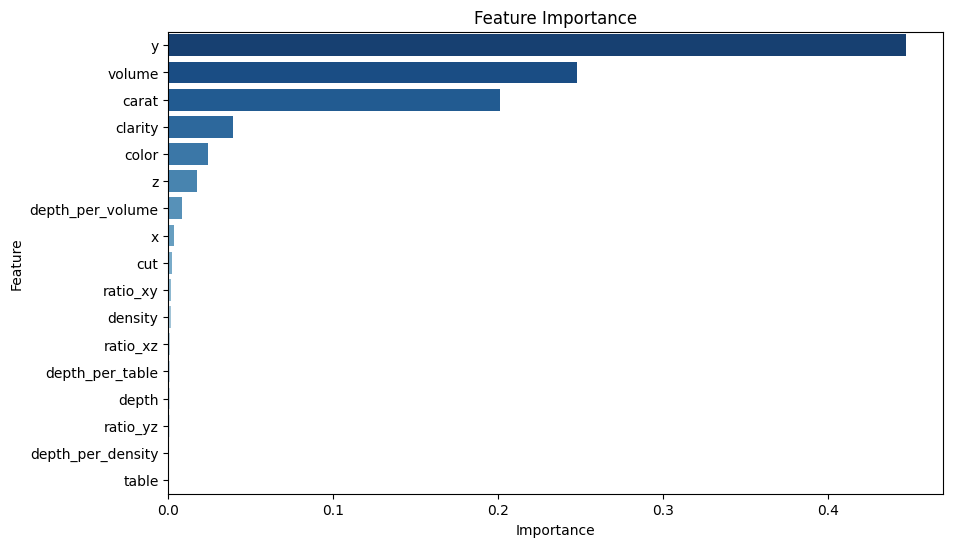

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_relevance, palette='Blues_r')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

#### Best train scores

In [6]:
top_score.head(5)

,params,mean_test_score
8,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-547.787477
7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-548.616606
6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-558.259833
5,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",-561.492331
4,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",-567.850369


#### Test model

In [7]:
predictor = Predict('../models/best_unbalanced_model.pkl')  
y_pred = predictor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  =  mean_absolute_error(y_test, y_pred)

print(f'rmse test: {rmse}')
print(f'mae test: {mae}')

rmse test: 521.7446558565866
mae test: 268.2372914730228


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Balanced Data</p>

#### Train model

In [8]:
processor = ZirconsDataProcessor(df_bal)
data, price = processor.data_processor()

X_train, X_test, y_train, y_test = split_data(data, price)

trainer = Train()
best_model, feature_relevance, top_score = trainer.train_model(X_train, y_train, 
                                           'best_balanced_model')

Fitting 3 folds for each of 27 candidates, totalling 81 fits


#### Feature relevance

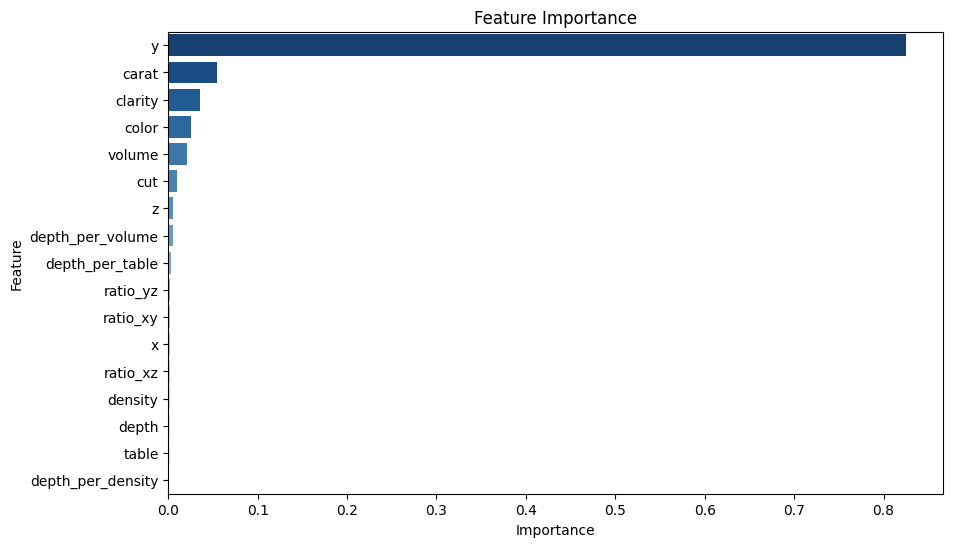

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_relevance, palette='Blues_r')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

#### Test model

In [10]:
predictor = Predict('../models/best_balanced_model.pkl')  
y_pred = predictor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  =  mean_absolute_error(y_test, y_pred)

print(f'rmse test: {rmse}')
print(f'mae test: {mae}')

rmse test: 685.3129627895665
mae test: 369.48215099450977


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Conclusions:</p>

* The model was trained using 70% of the data and tested on the remaining 30%.

* The most relevant features were determined, with the 'y' size feature being the most influential, followed by volume, carat, and clarity.

* Despite showing significant variability in the initial exploration, color proved to have relevance for predicting the model.

* The model was trained both with balanced and unbalanced data for the 'cut' feature. 

* However, no substantial improvement was observed, as 'cut' is a less relevant feature for prediction. Therefore, the unbalanced version of the model will be used for exposition, eliminating the need for additional balancing steps.